<a href="https://colab.research.google.com/github/kunalsonalkar/transformers-nlp/blob/main/PyTorch_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Practice

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [ ]:
# Getting a dataset
train_data = datasets.FashionMNIST(
    root ="data",
    train=True, #do we want the training dataset
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None # how do we want to transform the labels/targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11905078.23it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201029.68it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3756115.12it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5301320.16it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_to_idx = train_data.class_to_idx

In [ ]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image,label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
# How much training data do we have ?
len(train_data.data), len(train_data.targets)

(60000, 60000)

Image Shape is torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

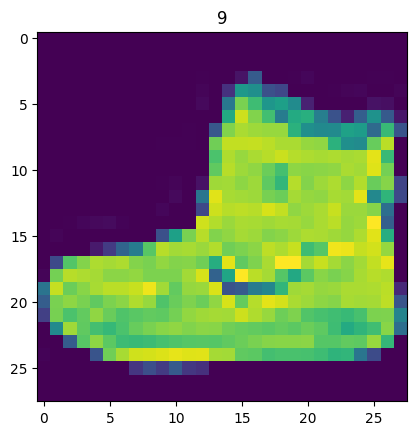

In [ ]:
# Visualizing our data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape is {image.shape}")
plt.imshow(image.squeeze()) # remove the extra dimension of color channel
plt.title(label)

Text(0.5, 1.0, '9')

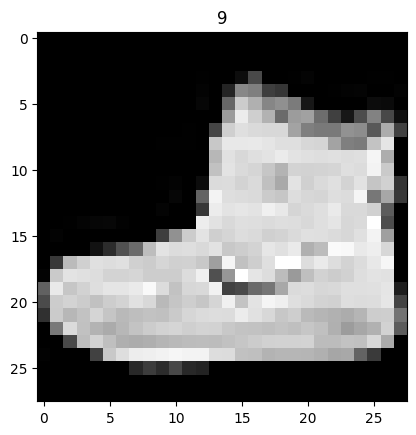

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)

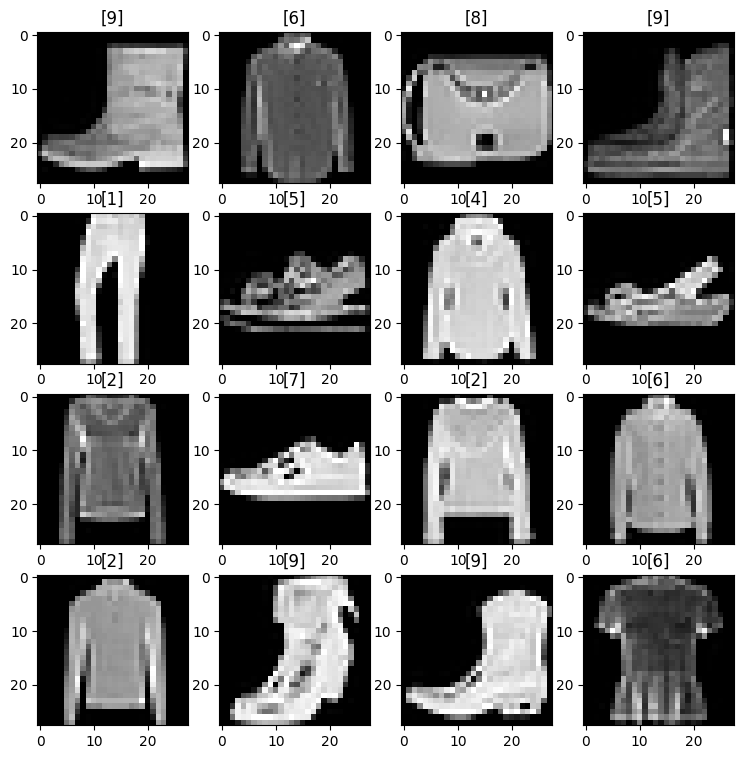

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title([label])


# Setting up a Dataloader

In [ ]:
from torch.utils.data import DataLoader

# setup the batch size
BATCH_SIZE = 32

# Turn your dataset into iterable (batches)
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True) #shuffle data every epoch

test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)

# Printing
print(f"Train dataloader size is {len(train_dataloader)}")
print(f"Test dataloader size is {len(test_dataloader)}")

Train dataloader size is 1875
Test dataloader size is 313


Image shape is torch.Size([1, 28, 28])
Len of train_features_btach is torch.Size([32, 1, 28, 28])


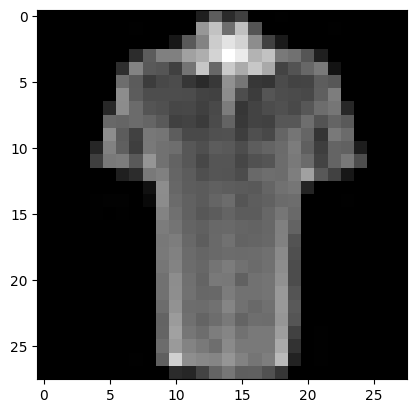

In [ ]:
# Inside the DataLoader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
print(f"Image shape is {img.shape}")
print(f"Len of train_features_btach is {train_features_batch.shape}")

# Building a baseline linear model

In [ ]:
from torch.nn.modules import flatten
# we will use flatten to change the image from 28*28 to 784 by 1 size
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"shape before flattening is {x.shape}")
print(f"shape after flattening is {output.shape}")

shape before flattening is torch.Size([1, 28, 28])
shape after flattening is torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModel01(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

# Lets instantiate the model

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModel01(input_shape = 784, hidden_units=10, output_shape=len(class_to_idx))
model_0

FashionMNISTModel01(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# Setup Loss, Optimizer and evaluation metrics


In [ ]:
# Using helper functions file - making it more modular
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr =0.1)

In [ ]:
# Adding a timer to the code
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.
  Args:
    start (float): Start time of computation
    end (float) : End time of computation
  Returns:
    float: time between start and end in seconds
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time} seconds")
  return total_time

# Creating a training loop and putting the pieces together

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")
  ## Training
  train_loss = 0
  ## Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print how many samples we have seen so far
    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # avg loss per epoch

  ## Testing

  # setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y) # add up losses

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss} | Test loss: {test_loss} | Test Accuracy: {test_acc}")


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.5903892517089844 | Test loss: 0.5101593732833862 | Test Accuracy: 82.03873801916933
epoch: 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4743497967720032 | Test loss: 0.5267699360847473 | Test Accuracy: 81.67931309904154
epoch: 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45367076992988586 | Test loss: 0.5126373171806335 | Test Accuracy: 82.99720447284345


#Making predictions from Model01

---



In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  # setting the inital loss & accuracy to 0
  loss, acc = 0, 0
  # going to eval model
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModel01',
 'model_loss': 0.5119838118553162,
 'model_acc': 83.02715654952077}


#Building Model with Non-Linearity

In [ ]:
class FashionMNISTModel02(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # need to flatten due to image
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
    # self forward pass
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModel02(input_shape=784, hidden_units=10, output_shape=len(class_to_idx))

In [ ]:
#setting up loss functions, optimizers
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr =0.1)

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")
  ## Training
  train_loss = 0
  ## Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    # 1. Forward pass
    y_pred = model_1(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print how many samples we have seen so far
    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # avg loss per epoch

  ## Testing

  # setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_1(X)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y) # add up losses

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss} | Test loss: {test_loss} | Test Accuracy: {test_acc}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.0919920206069946 | Test loss: 0.9569015502929688 | Test Accuracy: 64.97603833865814
epoch: 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.737794816493988 | Test loss: 0.7238787412643433 | Test Accuracy: 74.21126198083067
epoch: 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.6677614450454712 | Test loss: 0.6875132322311401 | Test Accuracy: 75.63897763578275


In [ ]:
# set the number of epochs
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")
  ## Training
  train_loss = 0
  ## Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    # 1. Forward pass
    y_pred = model_1(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print how many samples we have seen so far
    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # avg loss per epoch

  ## Testing

  # setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_1(X)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y) # add up losses

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss} | Test loss: {test_loss} | Test Accuracy: {test_acc}")

# Functionizing training and test loops

In [ ]:
# we will pass model, train dataloader, loss function and an optimizer
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  train_loss, train_acc = 0, 0
  ## Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    # 1. Forward pass
    y_pred = model_1(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print how many samples we have seen so far
    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) # avg loss per epoch
  print(f"Train loss: {train_loss}")



In [ ]:
# Actual training
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr =0.1)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")
  train_step(model=model_1,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
  #test_step(data_loader=test_dataloader, model=model_1,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.3025569915771484
Epoch: 1

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.3025569915771484
Epoch: 2

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 2.3025569915771484


In [ ]:
### Daniel's code copy
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    #model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        #X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    #model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            #X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

# New Section

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30256 | Train accuracy: 10.00%
Test loss: 2.30259 | Test accuracy: 10.00%

Epoch: 1
---------
Train loss: 2.30256 | Train accuracy: 10.00%
Test loss: 2.30259 | Test accuracy: 10.01%

Epoch: 2
---------
Train loss: 2.30256 | Train accuracy: 10.00%
Test loss: 2.30259 | Test accuracy: 9.99%



NameError: ignored

In [ ]:
model_1_results = eval_model(model_1, data_loader=test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)
model_1_results

In [ ]:
model_0_results

# Building Convolutional Neural Network

In [ ]:
# Creating a convolution neural network

class FashionMNISTModel03(nn.Module):
  """
  This model is replicated from poloclub.github.io
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # creating the first block -> convolution layer, activation layer, pooling layer
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, #how big is the filter size going over the image (3*3 in this case)
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.tensor):
    x = self.block_1(x)
    print(x.shape)
    x = self.block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModel03(input_shape=1, hidden_units=10, output_shape=len(class_to_idx))
model_2


In [ ]:
# test/toy example to understand the convolution layer
torch.manual_seed(42)
images = torch.randn(size=(3,3,16,16))
test_image = images[1]

In [ ]:
test_image

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image)

In [ ]:
conv_layer(test_image.unsqueeze(dim=0)).shape

In [ ]:
# lets try second convolution layer
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5,5),
                         stride=2,
                         padding=0)
conv_layer_2(test_image).shape

In [ ]:
test_image.shape

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Using the previously created train and test functions
torch.manual_seed(42)

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model_2, train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
  #test_step(model_2, test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
